# Práctica 2: 



##### Cookbook [@data_mining_2020](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020/blob/master/README.ipynb)

## Resources

* [Missigno](https://github.com/ResidentMario/missingno)


### **Prerequisitos** 

Instalar [missigno](https://anaconda.org/conda-forge/missingno) a través de ```conda``` (o sea en la terminal)

```conda install -c conda-forge missingno```

Situarse en la carpeta ```/vagrant/``` pues ahí está la *carpeta compartida* entre la máquina vitual y nuestro sistema operativo. ¿Dónde dice? Pues cuando corremos la máquina virtual con ```vagrant up```, nos dice dónde está esa carpeta en ambos lados

```
==> ubuntu-18-01: Mounting shared folders...
    ubuntu-18-01: /vagrant => /Users/jacoboleon/Documents/vagrant-ubuntu
```

Entonces el sitio de trabajo será esa carpeta ```/vagrant/```

```cd /vagrant/```


Descargar la tabla ```vivienda``` de la ENH

* En terminal

  *A través de ```wget```

    ```wget https://www.inegi.org.mx/contenidos/programas/enh/2017/microdatos/vivienda_enh_2017_csv.zip```
  * Instalar ```unzip```
  
    ```sudo apt-get install unzip```

  * Checar la versión instalada

    ```unzip -v```

  * Descomprimir el ```.zip```

    ```unzip vivienda_enh_2017_csv.zip```

Inicializar un entorno de trabajo con Anacoda, puede ser de manera local en el propio sistema operativo, a través de ```anaconda-navigator``` o con una máquina virtual. Si se utiliza lo segundo, la máquina virtual, entonces se puede acceder de dos formas:

* Checar la [Práctica 0: configurar el entorno de trabajo](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020/blob/master/Pr%C3%A1ctica_0.ipynb)

* Ejecutar el servicio ```jupyter lab``` 

  ```jupyter-lab --ip=0.0.0.0 --NotebookApp.token=''```

* Ejecutar el servicio y dejarlo activo

  ```nohup jupyter-lab --ip=0.0.0.0 --NotebookApp.token='' --allow-root > error.log &```

Si se utiliza ```anaconda-navigator``` simplemente click en el botón *launch* donde dice Jupyter Lab

![](https://docs.google.com/uc?export=download&id=1Y6FbUz4hI03SFeu6RVeGmX83zrm1tD4_)


## Recipe 

### LOAD

Importar paquetes

In [77]:
conda install -c conda-forge missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

Si aparece este error hay que instalar ```missigno``` 

```
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-1-3b696379d9e4> in <module>
      1 import pandas as pd
----> 2 import missingno as msno
      3 import numpy as np
      4 get_ipython().run_line_magic('matplotlib', 'inline')

ModuleNotFoundError: No module named 'missingno'
```

Definimos la ruta del archivo

In [79]:
file1 = "./ml-100k/u.data.csv"
file2 = "./ml-100k/u.item.csv"
file3 = "./ml-100k/u.user.csv"

In [80]:
ratings_cols = ["UserID", "ItemID", "Rating", "TimeStamp"]
items_cols = ["movie id", "movie title", "release date", "video release date", "IMDb URL", "unknown", "Action", "Adventure",
              "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical",
              "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
users_cols = ["user id", "age", "gender", "occupation", "zip code"]

Cargamos la tabla en un dataframe 



In [81]:
df_ratings = pd.read_csv(file1, sep="\t", names=ratings_cols)
df_items = pd.read_csv(file2, sep="|", names=items_cols, encoding='latin-1')
df_users = pd.read_csv(file3, sep="|", names=users_cols, encoding='latin-1')

In [82]:
pd.set_option('display.max_columns', None)

In [83]:
df_ratings.head()

,UserID,ItemID,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [84]:
df_users = df_users.drop(['zip code'], axis=1)
df_users.head()

,user id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [85]:
df_items = df_items.drop(['video release date', 'IMDb URL'], axis=1)
df_items.head() 

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [86]:
df1 = pd.merge(left = df_ratings, right = df_users,
                       how = "inner", left_on = "UserID", right_on = "user id")
df = pd.merge(left = df1, right = df_items,
                       how = "inner", left_on = "ItemID", right_on = "movie id")

In [87]:
df = df.drop(['user id', 'movie id'], axis=1)

In [88]:
df

,UserID,ItemID,Rating,TimeStamp,age,gender,occupation,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,Kolya (1996),24-Jan-1997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,Kolya (1996),24-Jan-1997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,Kolya (1996),24-Jan-1997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,Kolya (1996),24-Jan-1997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,Kolya (1996),24-Jan-1997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,181,242,1,878961814,26,M,executive,Kolya (1996),24-Jan-1997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,201,242,4,884110598,27,M,writer,Kolya (1996),24-Jan-1997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,249,242,5,879571438,25,M,student,Kolya (1996),24-Jan-1997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,13,242,2,881515193,47,M,educator,Kolya (1996),24-Jan-1997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,279,242,3,877756647,33,M,programmer,Kolya (1996),24-Jan-1997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Copiamos el dataframe para trabajar sobre él sin alterar el origen de los datos

In [89]:
df_copy = df.copy()

Revisamos las dimensiones del problema, literalmente

In [90]:
df_copy.shape

(100000, 28)

Revisamos el número de observaciones o filas

In [91]:
df_copy.shape[0]

100000

Revisamos el número de variables o características o atributos

In [92]:
df_copy.shape[1]

28

Revisamos las variables

In [93]:
df_copy.columns

Index(['UserID', 'ItemID', 'Rating', 'TimeStamp', 'age', 'gender',
       'occupation', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

Enlistamos las columnas

In [94]:
list(df_copy.columns)

['UserID',
 'ItemID',
 'Rating',
 'TimeStamp',
 'age',
 'gender',
 'occupation',
 'movie title',
 'release date',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

Seleccionamos una variable y reviamos sus valores

In [95]:
df_copy['occupation'].value_counts()

student          21957
other            10663
educator          9442
engineer          8175
programmer        7801
administrator     7479
writer            5536
librarian         5273
technician        3506
executive         3403
healthcare        2804
artist            2308
entertainment     2095
scientist         2058
marketing         1950
retired           1609
lawyer            1345
none               901
salesman           856
doctor             540
homemaker          299
Name: occupation, dtype: int64

Seleccionamos una variable y revisamos los valores únicos

In [96]:
df_copy['occupation'].unique()

array(['writer', 'programmer', 'executive', 'retired', 'marketing',
       'student', 'educator', 'entertainment', 'engineer', 'other',
       'technician', 'scientist', 'artist', 'administrator', 'lawyer',
       'homemaker', 'librarian', 'healthcare', 'none', 'salesman',
       'doctor'], dtype=object)

Revisamos todas las columnas y checamos sus valores únicos 

In [97]:
l = []
bandera = np.NAN
for column in df_copy.columns:
    if df_copy[column].dtype == np.int64:
        bandera = 'entero'
    elif df_copy[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
        
    try:
        df_copy[column] =df_copy[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df_copy[column].nunique())
    print('UNIQUE: ', df_copy[column].unique())
    print('VALUE COUNTS ', df_copy[column].value_counts())
    print('\n')

COLUMNA:  UserID
TIPO:  entero
NUNIQUE:  943
UNIQUE:  [196 305   6 234  63 181 201 249  13 279 145  90 271  18   1 207  14 113
 123 296 154 270 240 144  21 239 111 129 131 226 306 173   2 205 195 199
 202 206  35  34 204  30 209   9  12  40 331  86 139 309 354 360 355 416
 408 417 428 440 439 451 460 461 463 473 486 492 497 500 523 520 532 485
 533 537 539 566 574 568 592 594 597 617 624 628 639 651 655 641 673 697
 680 707 695 675 721 724 720 743 733 740 735 758 753 767 771 765 794 803
 845 863 861 871 866 869 894 898 937  22 244 298 286 200 210 303 194 291
 299 308  95  38 102 301 290 276   7 246  59  87  60  92 254 293 222 267
  11 110  94 128 262 174  43 269  85 213   5 130  56 125  83 151  70 307
 193 275 184 109  65 230 280 152 283 311 208 313 314 318 326 327 330 336
 345 363 371 373 374 378 379 387 389 393 394 398 399 405 406 407 429 435
 437 450 453 455 457 472 471 476 478 484 487 481 496 495 504 506 514 524
 521 528 541 542 545 551 559 561 562 577 579 588 586 591 593 606 620 6

NUNIQUE:  240
UNIQUE:  ['24-Jan-1997' '01-Jan-1993' '01-Jan-1994' '11-Jul-1997' '01-Jan-1986'
 '01-Jan-1997' '01-Jan-1987' '01-Jan-1979' '26-Apr-1996' '01-Jan-1995'
 '08-Mar-1996' '15-Nov-1996' '01-Jan-1990' '01-Jan-1971' '01-Jan-1978'
 '04-Jul-1997' '12-Apr-1996' '18-Dec-1996' '23-Apr-1996' '04-Oct-1996'
 '27-Jun-1997' '31-Jan-1997' '28-Jun-1996' '01-Jan-1988' '30-Oct-1995'
 '09-Feb-1996' '28-Sep-1996' '09-May-1997' '11-Oct-1996' '15-Aug-1997'
 '13-Sep-1996' '01-Jan-1991' '25-Oct-1996' '23-Feb-1996' '19-Apr-1996'
 '18-Apr-1997' '30-Mar-1996' '08-Nov-1996' '13-Dec-1996' '25-Sep-1996'
 '07-Jun-1996' '20-Dec-1996' '27-Nov-1996' '07-Feb-1997' '14-Feb-1997'
 '01-Jan-1996' '10-May-1996' '22-Aug-1997' '21-Jun-1996' '01-Jan-1992'
 '07-Mar-1997' '06-Jun-1997' '19-Jul-1996' '16-Aug-1996' '03-Jul-1996'
 '17-Jul-1996' '17-Jan-1997' '02-Aug-1996' '14-Aug-1995' '21-Mar-1997'
 '01-Jan-1966' '20-Jun-1997' '26-Sep-1997' '22-May-1996' '05-Oct-1996'
 '02-May-1997' '26-Jul-1996' '01-Jan-1954' '01-Jan-196

Graficamos los datos en bruto (*raw data*)

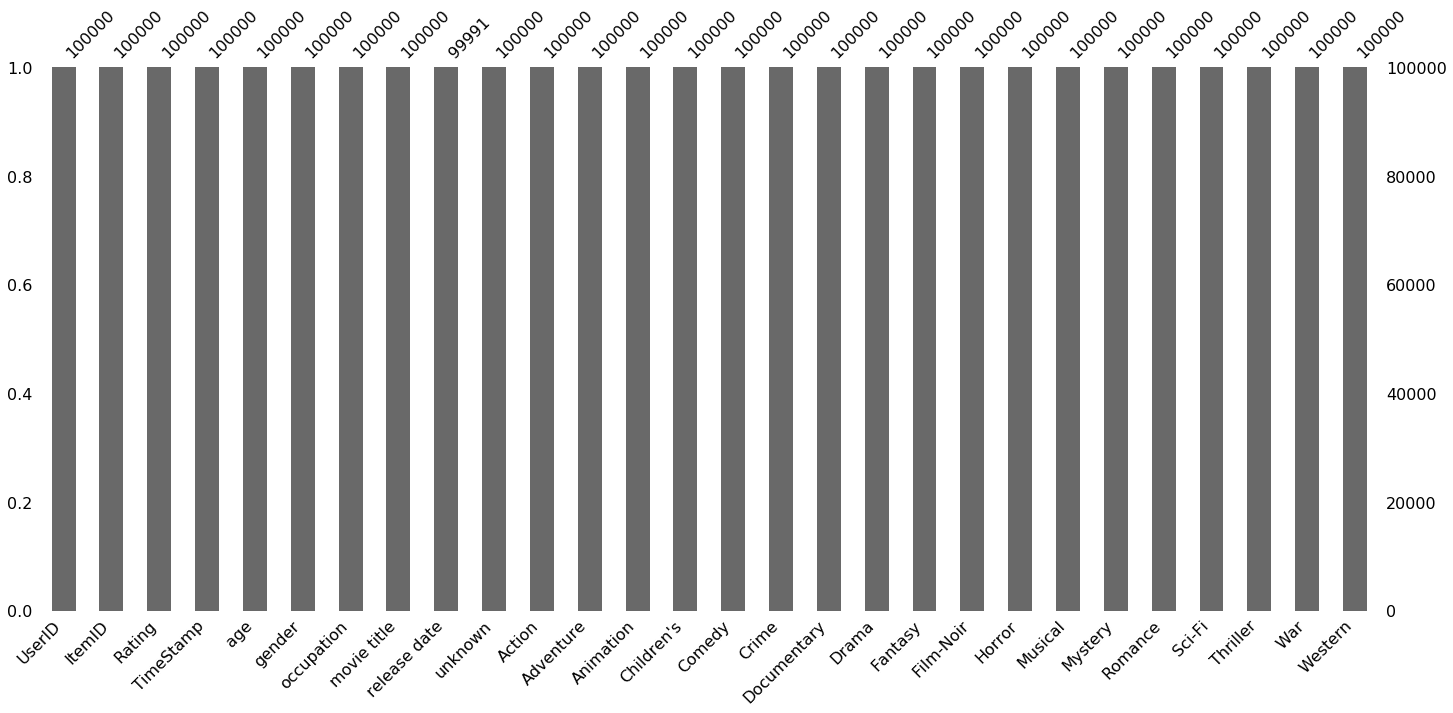

In [98]:
msno.bar(df_copy)

Revisamos la existencia de valores nulos

In [99]:
df_copy.isnull().any().any()

True

Reemplazamos los valores ```&``` y ```' '``` por ```nan```

In [100]:
df_copy.replace(to_replace='&', value=np.nan, inplace=True)

In [101]:
df_copy.replace(to_replace=' ', value=np.nan, inplace=True)

Revisamos (de nuevo) la existencia de valores nulos

In [102]:
df_copy.isnull().any().any()

True

Graficamos los datos con valores nulos reales

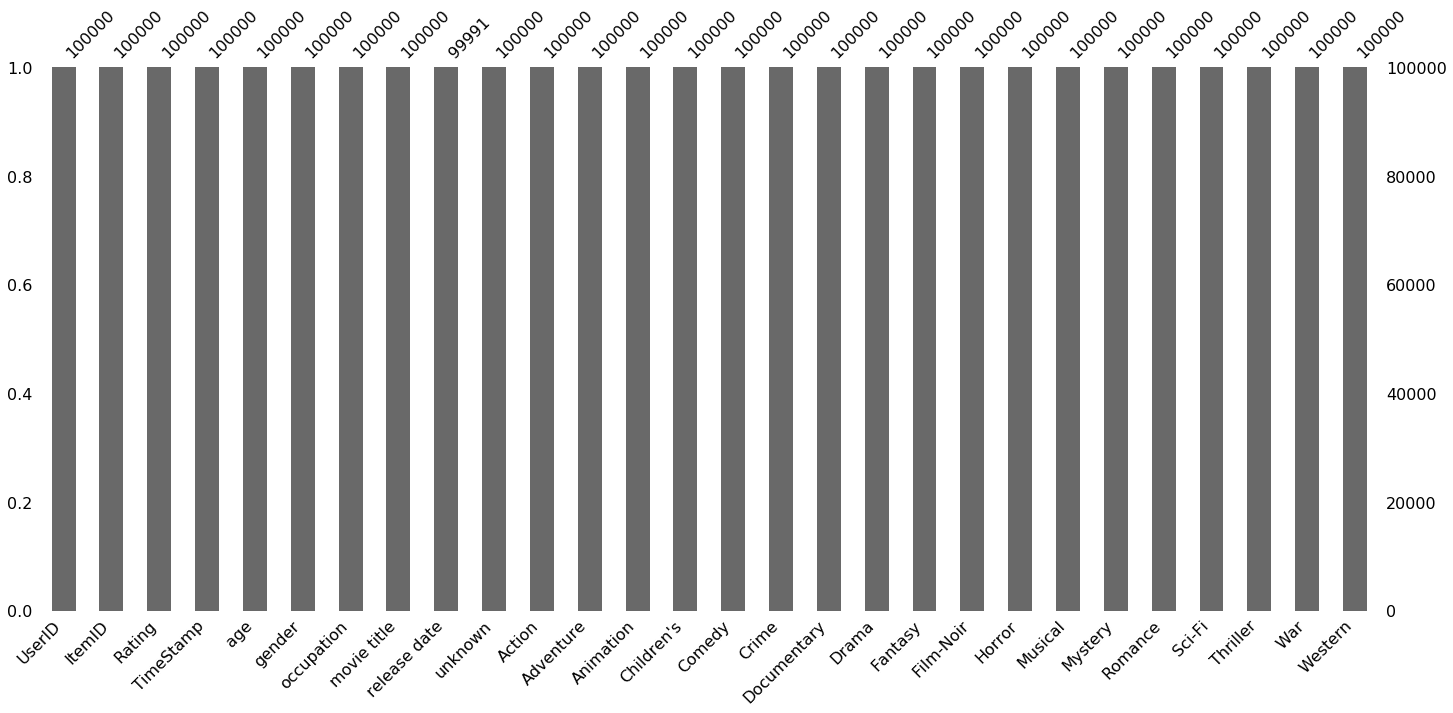

In [103]:
msno.bar(df_copy)

Guardamos el dataframe 

Definimos la ruta

In [104]:
file = "./ml-100k/movie_lens.csv"

In [105]:
df_copy.to_csv(file)

### Clean

Reemplazamos el

In [106]:
df_copy.fillna(value='01-Jan-2020', inplace=True)

In [107]:
#df_copy['release date'] = pd.to_datetime(df_copy['release date'])

In [108]:
#df_copy.dtypes

In [109]:
threshold = round(df_copy.shape[0]*.75)
threshold

75000

In [110]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            print(column, ': ', 'd e l e t e d')
            l.append(column)

gender :  74260  -  75000
gender :  d e l e t e d
occupation :  99701  -  75000
movie title :  99999  -  75000
release date :  99999  -  75000


In [111]:
l

['gender']

In [112]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [113]:
df_copy.replace(to_replace='01-Jan-2020', value=np.NaN, inplace=True)

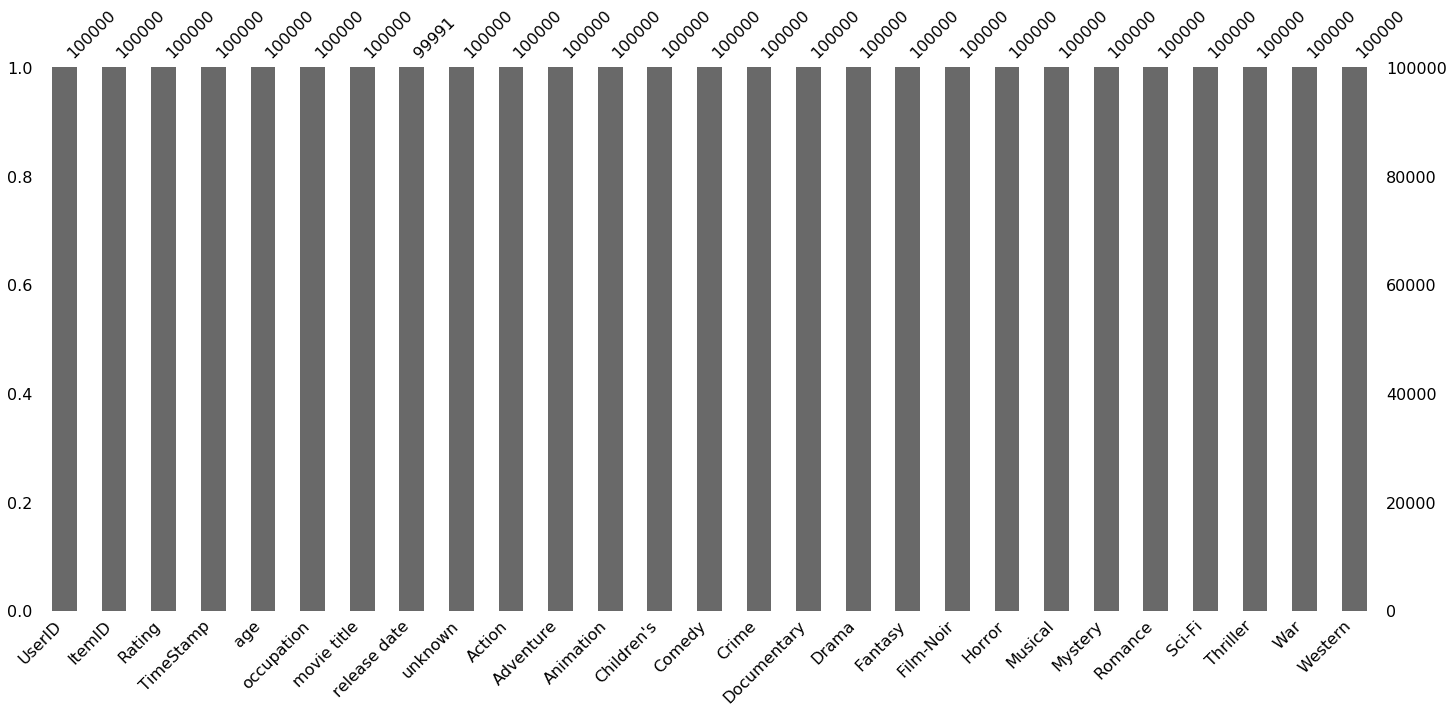

In [114]:
msno.bar(df_copy)

Guardamos el dataframe 

Definimos la ruta

In [115]:
file = "./ml-100k/movie_lens.csv"

In [116]:
df_copy.to_csv(file)

A estas alturas podemos también eliminar simplemente las observaciones que tienen valores nulos

```df_copy.dropna(inplace=True)```